In [1]:
import matplotlib.pyplot as plt
from sklearn.svm import SVC
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score 
import numpy as np

In [2]:
dataset = pd.read_csv("../FINAL_CSVs/DATASET_MDs.csv")

In [3]:
X_values = dataset.drop(columns=["MRID","diagnosis"])
Y_values = dataset["diagnosis"]

In [4]:
X_train, x_test, y_train, y_test = train_test_split(X_values, Y_values, test_size=0.2, random_state=42) #dividir datasets

In [5]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
x_test_scaled = scaler.transform(x_test)

In [6]:
#Crear pipeline
#pipeline = Pipeline([('scaler',StandardScaler(),('pca',PCA(n_components=40)),('rf',RandomForestClassifier()])

In [7]:
pca_40 = PCA(n_components=40)
X_pca_40 = pca_40.fit_transform(X_train_scaled)
X_test_pca = pca_40.transform(x_test_scaled)

rf_on_pca_40 = RandomForestClassifier(n_estimators=100, random_state=42)
rf_on_pca_40.fit(X_pca_40, y_train)
rf_top_35_pca_indices = rf_on_pca_40.feature_importances_.argsort()[-35:][::-1]
X_pca_rf_35 = X_pca_40[:, rf_top_35_pca_indices]
X_test_pca_35 = X_test_pca[:, rf_top_35_pca_indices]


anova_final_selector = SelectKBest(score_func=f_classif, k=20)
X_final = anova_final_selector.fit_transform(X_pca_rf_35, y_train)
X_test = anova_final_selector.transform(X_test_pca_35)


svm_model = SVC(kernel='rbf', C=10, gamma=0.001, random_state=42)
svm_model.fit(X_final, y_train)
y_predict = svm_model.predict(X_test)
accuracy = accuracy_score(y_test, y_predict)
accuracy

0.8142857142857143

In [8]:
print(y_predict)
print(list(y_test))
dataset = pd.read_csv("FINAL.csv")
X_values = dataset.drop(columns = ["MRID","diagnosis"])
Y_values = dataset["diagnosis"]

new_predict 

[0 2 2 0 0 2 2 0 2 0 1 0 0 0 2 1 0 0 2 1 0 1 2 1 0 1 2 1 1 0 2 0 1 1 2 2 1
 1 0 0 1 1 2 1 2 0 1 2 1 2 2 1 2 1 2 2 1 0 1 2 2 1 1 2 1 1 0 2 0 2]
[0, 2, 2, 0, 0, 2, 2, 0, 2, 0, 1, 0, 0, 0, 0, 1, 2, 1, 1, 1, 0, 1, 0, 2, 1, 1, 2, 1, 1, 0, 2, 0, 1, 1, 2, 1, 1, 1, 0, 2, 1, 1, 2, 1, 2, 0, 1, 2, 1, 2, 2, 1, 1, 1, 2, 2, 1, 0, 1, 1, 0, 1, 1, 2, 1, 1, 0, 0, 0, 2]


In [9]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

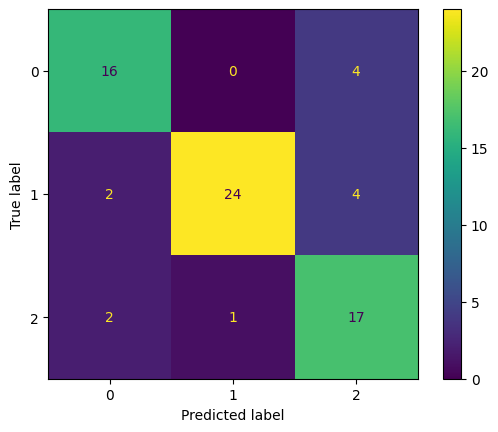

In [10]:
cf = confusion_matrix(y_test,y_predict, labels=svm_model.classes_)
DISP = ConfusionMatrixDisplay(cf, display_labels=svm_model.classes_)
DISP.plot()

In [11]:
pca_40.components_

array([[ 0.08174266,  0.08832804,  0.00380678, ...,  0.04696473,
         0.05671034,  0.05336982],
       [-0.00352816, -0.00211119, -0.00571941, ...,  0.06432053,
        -0.04400192,  0.05342809],
       [ 0.10502038,  0.07651994,  0.12516063, ..., -0.0739751 ,
        -0.03256441, -0.01920171],
       ...,
       [-0.02195683,  0.00335697, -0.09004639, ..., -0.07254549,
        -0.15560761,  0.02665681],
       [-0.00079697, -0.00600804,  0.0159156 , ..., -0.03526116,
         0.07531977, -0.06691592],
       [-0.00482581, -0.00384204, -0.00565625, ..., -0.0294796 ,
        -0.13282831,  0.15327371]], shape=(40, 260))

In [12]:
anova_final_selector.scores_

array([17.05349627, 38.76860107, 20.4466344 , 21.46415252,  9.16139796,
       15.80098562,  9.73754601, 14.50097241,  5.27222535,  3.20581971,
        1.50433907,  2.27618892,  5.76478878,  1.76219381,  3.61491568,
        2.90894038,  0.68448307,  0.99240091,  0.78485709,  0.60809202,
        0.74032618,  2.02914357,  0.93723351,  1.63410383,  1.2129453 ,
        1.64628309,  0.85117675,  0.83565521,  0.68512215,  1.0771749 ,
        0.70703851,  0.07943875,  0.07026323,  1.16224666,  0.8002558 ])

In [13]:
rf_top_35_pca_indices

array([ 3,  0,  7, 10,  2,  5,  6, 21, 16, 24,  1, 15, 13, 30, 20, 36, 27,
       18, 32,  4, 33,  9, 31, 26, 17, 37, 11, 34, 28, 29, 19, 25, 35,  8,
       22])

In [14]:
X_pca_rf_35

array([[  1.39546851, -14.01143468,   0.60923684, ...,  -0.19300085,
         -1.29622908,  -0.27867785],
       [ -1.41775735,  -8.81568325,   0.72654377, ...,  -0.81606032,
          1.13065334,   1.44346217],
       [ -1.50721766,   1.96706744,   2.82250403, ...,   0.75460678,
         -0.64372629,  -0.30593082],
       ...,
       [ -1.56470153,  25.29432446,  -0.69428214, ...,  -1.76069569,
          3.34086689,  -0.65150099],
       [ -2.97632598,  -2.60910901,  -0.05881695, ...,  -0.03810781,
         -0.48329906,   1.16530644],
       [ -0.12330693,   6.10136656,   0.77276346, ...,  -0.50703127,
          2.56819389,  -1.37994276]], shape=(280, 35))

In [15]:
X_final

array([[ 1.39546851e+00, -1.40114347e+01,  6.09236837e-01, ...,
         1.04676136e+00,  1.18597929e+00, -4.08319032e-01],
       [-1.41775735e+00, -8.81568325e+00,  7.26543766e-01, ...,
        -1.05164505e+00,  7.00672312e-01,  2.00375726e+00],
       [-1.50721766e+00,  1.96706744e+00,  2.82250403e+00, ...,
         9.86673095e-01, -7.88792911e-01,  5.09175910e-01],
       ...,
       [-1.56470153e+00,  2.52943245e+01, -6.94282142e-01, ...,
         1.72284582e-01, -2.81186621e-01,  7.28868642e-01],
       [-2.97632598e+00, -2.60910901e+00, -5.88169545e-02, ...,
         1.03538642e+00, -1.14304855e-02,  8.92129077e-01],
       [-1.23306929e-01,  6.10136656e+00,  7.72763460e-01, ...,
        -1.24885940e+00, -7.49627992e-01, -2.08667021e-01]],
      shape=(280, 20))

In [16]:
chosen_features_anova = anova_final_selector.get_support()

In [17]:
chosen_PCA = [f"pca{value}" for value,boolean in zip(rf_top_35_pca_indices,chosen_features_anova) if boolean ]
chosen_PCA

['pca3',
 'pca0',
 'pca7',
 'pca10',
 'pca2',
 'pca5',
 'pca6',
 'pca21',
 'pca16',
 'pca24',
 'pca1',
 'pca15',
 'pca13',
 'pca30',
 'pca20',
 'pca36',
 'pca9',
 'pca26',
 'pca17',
 'pca37']

In [18]:
import re
pca_indexes = []
for chosen in chosen_PCA:
    index = int(re.findall(r'\d+', chosen)[0])
    print(index)
    pca_indexes.append(index)
    
X_columns = X_values.columns
weights = pca_40.components_[28]

3
0
7
10
2
5
6
21
16
24
1
15
13
30
20
36
9
26
17
37


In [19]:
roi_indexes = np.abs(weights).argsort()[::-1][:10]
roi_names = [X_columns[i] for i in roi_indexes]


In [20]:
dictionary = {
   
}

indexes_array = []

for i,pca_value in enumerate(chosen_PCA):
    index = pca_indexes[i]
    weight = pca_40.components_[index]
    roi_indexes = np.abs(weight).argsort()[::-1][:10]
    indexes_array.append(roi_indexes)
    dictionary[pca_value] = [X_columns[i] for i in roi_indexes]

flattened = [number for array in indexes_array for number in array]
unique = np.unique(flattened)
int(len(flattened))

200

In [15]:
#Second Model
rf_X = RandomForestClassifier(n_estimators=100, random_state=42)
rf_X.fit(X_train_scaled, y_train)
rf_top_35_indices = rf_X.feature_importances_.argsort()[-35:][::-1]
X_train_35 = X_train_scaled[:, rf_top_35_indices]
X_test_35 = x_test_scaled[:, rf_top_35_indices]


anova_final_selector = SelectKBest(score_func=f_classif, k=30)
X_final = anova_final_selector.fit_transform(X_train_35, y_train)
X_test = anova_final_selector.transform(X_test_35)

svm_model = SVC(kernel='rbf', C=10, gamma=0.01, random_state=42) #0.01 #C = 10
svm_model.fit(X_final, y_train)
y_predict = svm_model.predict(X_test)
accuracy = accuracy_score(y_test, y_predict)
accuracy




0.8285714285714286

In [22]:
names = [X.columns[i] for i in r]

array([[-1.29452147, -1.3175757 , -0.32421165, ..., -0.94805035,
         0.29712677,  0.41764097],
       [-0.3154504 , -0.50970303,  0.53874545, ..., -0.24632212,
        -1.41361427, -1.44925456],
       [ 0.50857622,  0.56872266, -0.03468665, ...,  0.71940361,
        -1.03533451, -0.5035279 ],
       ...,
       [ 2.77328448,  2.49947484,  1.75316144, ...,  0.96836534,
         1.58441706,  2.69230579],
       [ 0.32681706,  0.14068817,  0.6984361 , ..., -0.12184401,
        -0.40862448,  0.71732683],
       [ 0.80421263,  0.77939076,  0.33281586, ...,  1.82876896,
         1.29082454,  0.53309372]], shape=(280, 260))